<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/ML_Assignment_FN_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing Libraries

In [150]:
!pip install plotly==5.11.0
!pip install -U kaleido

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tqdm.notebook import tqdm


import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt




#reading the dataset

In [151]:

df =  pd.read_csv('/content/bank-full.csv', sep = ';')

In [152]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#dataset information

In [153]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#shape of dataset

In [154]:

df.shape

(45211, 17)

#Checking Null values for each columns

In [155]:

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#Visualize the distribution of the target variable

In [156]:
df["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

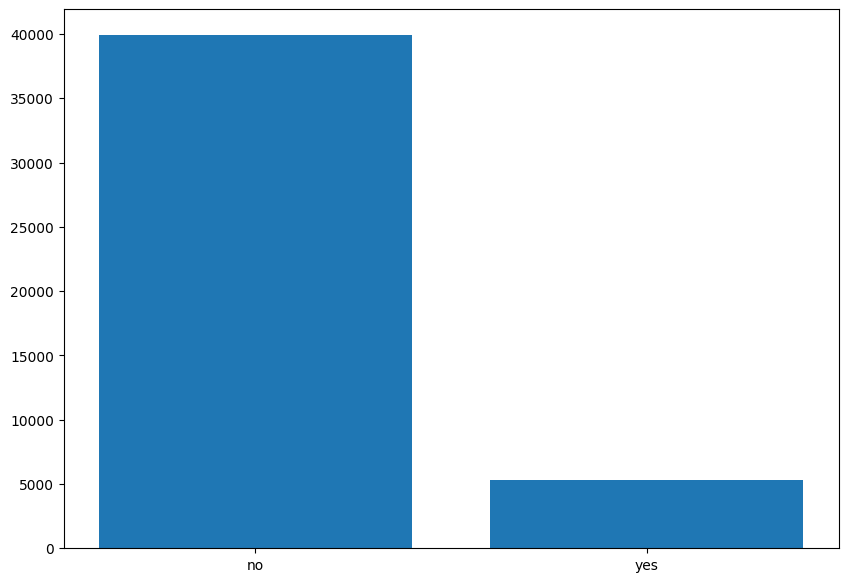

In [157]:

no = ["no","yes"]
yes = [39922,5289]
fig = plt.figure(figsize =(10, 7))
plt.bar(no, yes)
plt.show()

#one hot encoding

In [158]:
#Checking data types
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [159]:
#Automated encoding which column data type is object or cetagorial excepting our target column

for col in df.columns:
  if col!='y' and str(df[col].dtypes)=="object":
    dummies = pd.get_dummies(df[col])
    df = pd.concat([df,dummies],axis='columns').drop([col], axis='columns')

In [160]:
df.shape

(45211, 52)

In [161]:
df

,age,balance,day,duration,campaign,pdays,previous,y,admin.,blue-collar,...,jun,mar,may,nov,oct,sep,failure,other,success,unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,no,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,yes,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,yes,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,yes,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,no,0,1,...,0,0,0,1,0,0,0,0,0,1


In [162]:
#Checking data types again
df.dtypes

age               int64
balance           int64
day               int64
duration          int64
campaign          int64
pdays             int64
previous          int64
y                object
admin.            uint8
blue-collar       uint8
entrepreneur      uint8
housemaid         uint8
management        uint8
retired           uint8
self-employed     uint8
services          uint8
student           uint8
technician        uint8
unemployed        uint8
unknown           uint8
divorced          uint8
married           uint8
single            uint8
primary           uint8
secondary         uint8
tertiary          uint8
unknown           uint8
no                uint8
yes               uint8
no                uint8
yes               uint8
no                uint8
yes               uint8
cellular          uint8
telephone         uint8
unknown           uint8
apr               uint8
aug               uint8
dec               uint8
feb               uint8
jan               uint8
jul             

In [163]:
#label encoding taregt column (not onehot encoding)
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["y"]=encoder.fit_transform(df["y"])

#Spliting dataset Into X and y

In [164]:
X = df.loc[:,df.columns!="y"]
y = df['y']

In [165]:
X.shape

(45211, 51)

#Data balancing Using SMOTE (Over sampling)

In [166]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y= smote.fit_resample(X, y)

In [167]:
y.value_counts()

0    39922
1    39922
Name: y, dtype: int64

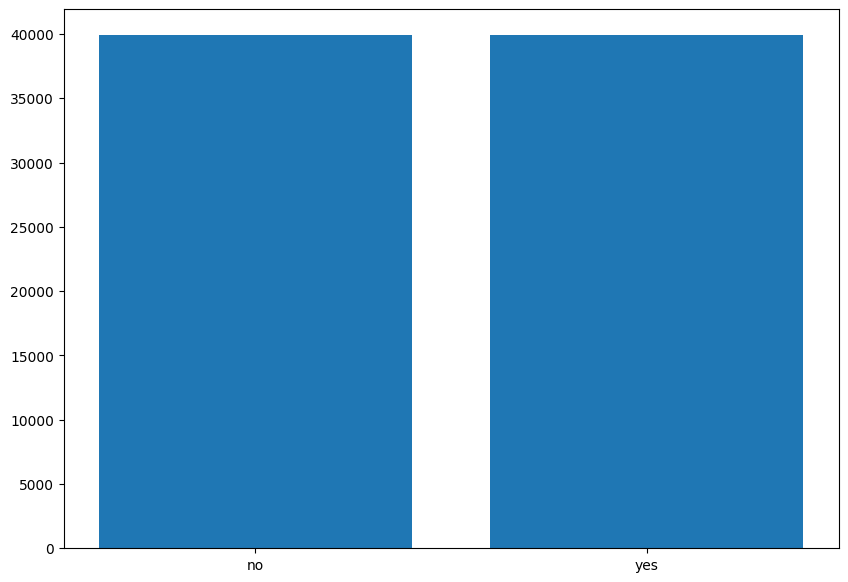

In [168]:
no = ["no","yes"]
yes = [39922,39922]
fig = plt.figure(figsize =(10, 7))
plt.bar(no, yes)
plt.show()

#Scaling The Data

In [169]:


from sklearn.preprocessing import StandardScaler

col = X.columns
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns = col)

#Data Splitting
Divide the dataset into a training set (70%), a validation set (15%), and a test set (15%)

In [170]:

from sklearn.model_selection import train_test_split
X_train, X_test_val, y_train, y_test_val= train_test_split(X,y, test_size=0.3,random_state=0)

#we divided 70:30 = train:test_val. Now we have 70% data in our test set. Then we devided 30% into half. So we have 15% of total data in trest and validation.
X_test, X_val, y_test, y_val= train_test_split(X_test_val, y_test_val, train_size=.5, random_state=0)


In [171]:
X_train.shape[0],X_val.shape[0],X_test.shape[0]

(55890, 11977, 11977)

#Model Selection & Training:

##ADABOOST

###For Deafult Hyparameters

In [172]:

from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier()
ada_defult.fit(X_train, y_train)
y_pred_val = ada_defult.predict(X_val)


print("Accurecy: ",accuracy_score(y_val, y_pred_val))

Accurecy:  0.9344577106120063


###Tunning `n_estimators`(done)

  0%|          | 0/31 [00:00<?, ?it/s]

1/151 round completed......................... Val Accuracy: 0.7187108624864323 >>>>>>Train Accuracy: 0.7197351941313294
6/151 round completed......................... Val Accuracy: 0.8224931117976121 >>>>>>Train Accuracy: 0.8258901413490786
11/151 round completed......................... Val Accuracy: 0.8856975870418302 >>>>>>Train Accuracy: 0.8897119341563786
16/151 round completed......................... Val Accuracy: 0.9006428988895383 >>>>>>Train Accuracy: 0.8998210771157631
21/151 round completed......................... Val Accuracy: 0.9064874342489772 >>>>>>Train Accuracy: 0.9090356056539631
26/151 round completed......................... Val Accuracy: 0.9184269850546881 >>>>>>Train Accuracy: 0.9244587582751834
31/151 round completed......................... Val Accuracy: 0.9271937880938466 >>>>>>Train Accuracy: 0.9292181069958848
36/151 round completed......................... Val Accuracy: 0.9286131752525674 >>>>>>Train Accuracy: 0.9319735194131329
41/151 round completed....

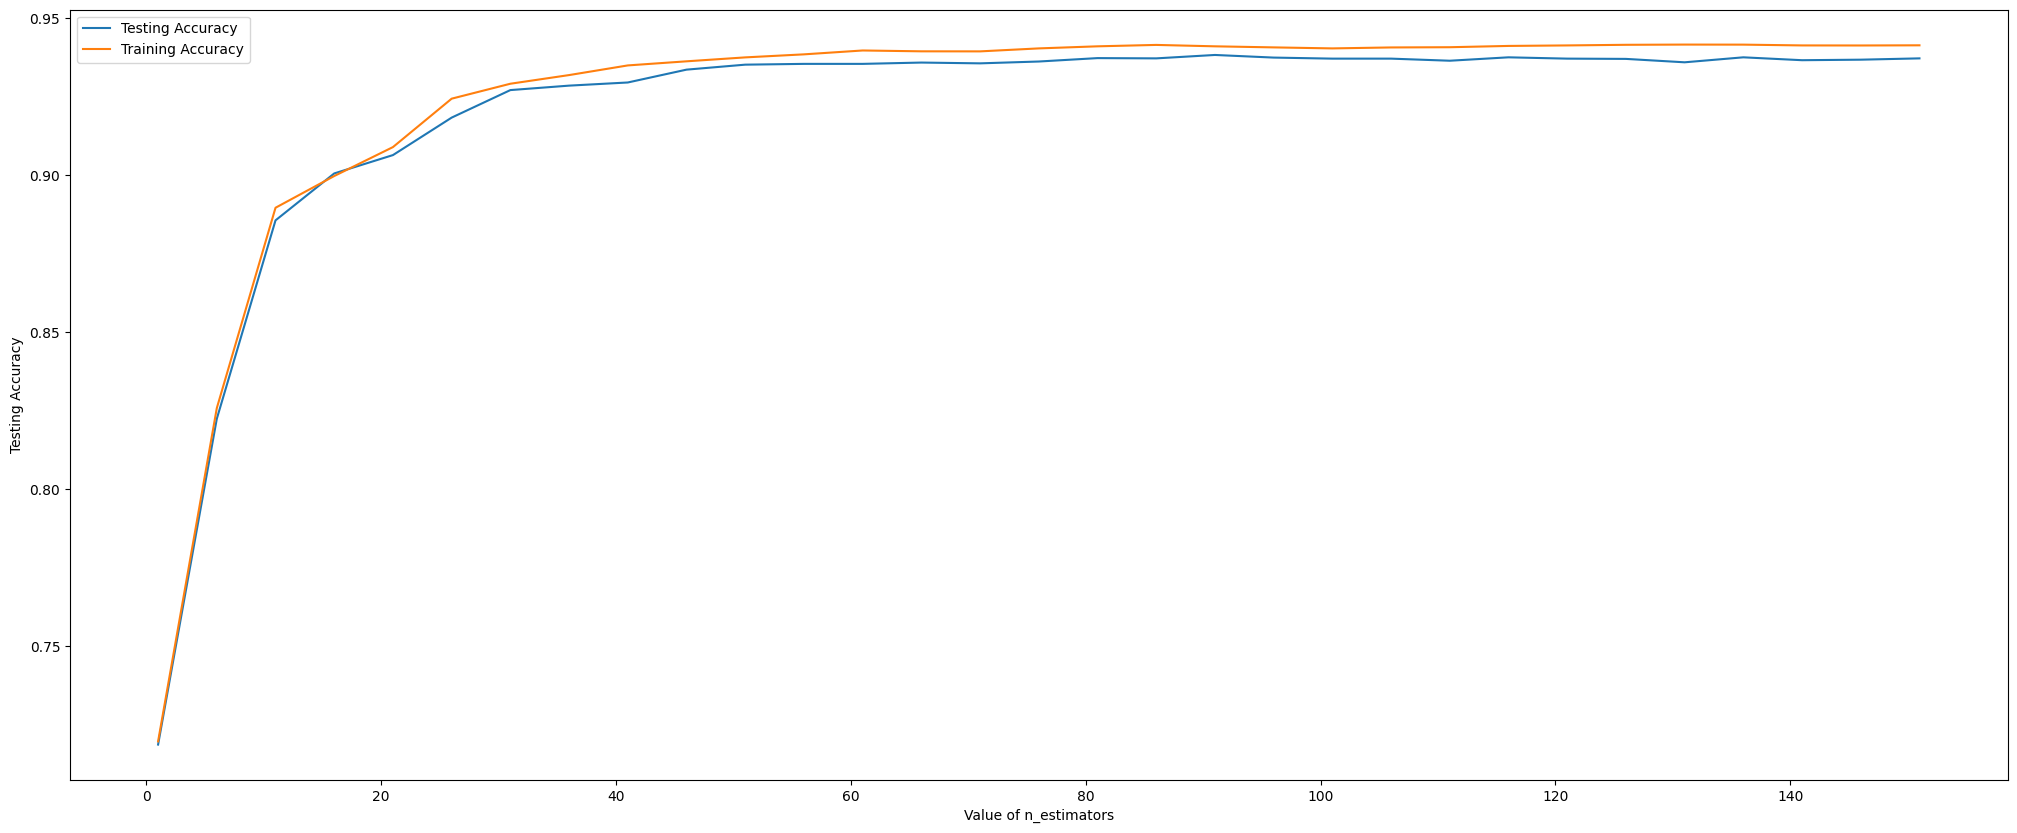

In [173]:
from sklearn.ensemble import AdaBoostClassifier
N=151
k_range = range (1,N+1,5)
scores={}
scores_list = []
score_list_train = []
for k in tqdm(k_range):
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)

  y_pred=classifier.predict(X_val)
  val_accu = accuracy_score(y_val,y_pred)
  scores[k] = val_accu
  scores_list.append(val_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  score_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed......................... Val Accuracy: "+str(val_accu),">>>>>>Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,score_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Training Accuracy"], loc=0, frameon=True)



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [174]:
ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5939
           1       0.96      0.92      0.94      6038

    accuracy                           0.94     11977
   macro avg       0.94      0.94      0.94     11977
weighted avg       0.94      0.94      0.94     11977

Accurecy:  0.9401352592468899


##Graddient Boosting

###Deafult Hyperparameters

In [175]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_default = GradientBoostingClassifier()
gradBoost_default.fit(X_train, y_train)
y_pred_val = gradBoost_default.predict(X_val)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val,y_pred_val))
print("Accurecy: ",accuracy_score(y_val, y_pred_val))

[[5524  326]
 [ 402 5725]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5850
           1       0.95      0.93      0.94      6127

    accuracy                           0.94     11977
   macro avg       0.94      0.94      0.94     11977
weighted avg       0.94      0.94      0.94     11977

Accurecy:  0.9392168322618352


###Tunning `n_estimators`

  0%|          | 0/80 [00:00<?, ?it/s]

1/400 round completed.........................Val Accurecy: 0.7967771562160808  >>>Train Accuracy: 0.8008409375559133
6/400 round completed.........................Val Accurecy: 0.841112131585539  >>>Train Accuracy: 0.8470567185543031
11/400 round completed.........................Val Accurecy: 0.8559739500709693  >>>Train Accuracy: 0.8639828234031133
16/400 round completed.........................Val Accurecy: 0.8898722551557151  >>>Train Accuracy: 0.8988370012524602
21/400 round completed.........................Val Accurecy: 0.9001419387158721  >>>Train Accuracy: 0.9082483449633209
26/400 round completed.........................Val Accurecy: 0.905151540452534  >>>Train Accuracy: 0.9141170155662909
31/400 round completed.........................Val Accurecy: 0.9129999165066377  >>>Train Accuracy: 0.9199141170155662
36/400 round completed.........................Val Accurecy: 0.9176755447941889  >>>Train Accuracy: 0.9244050814099123
41/400 round completed.........................Val A

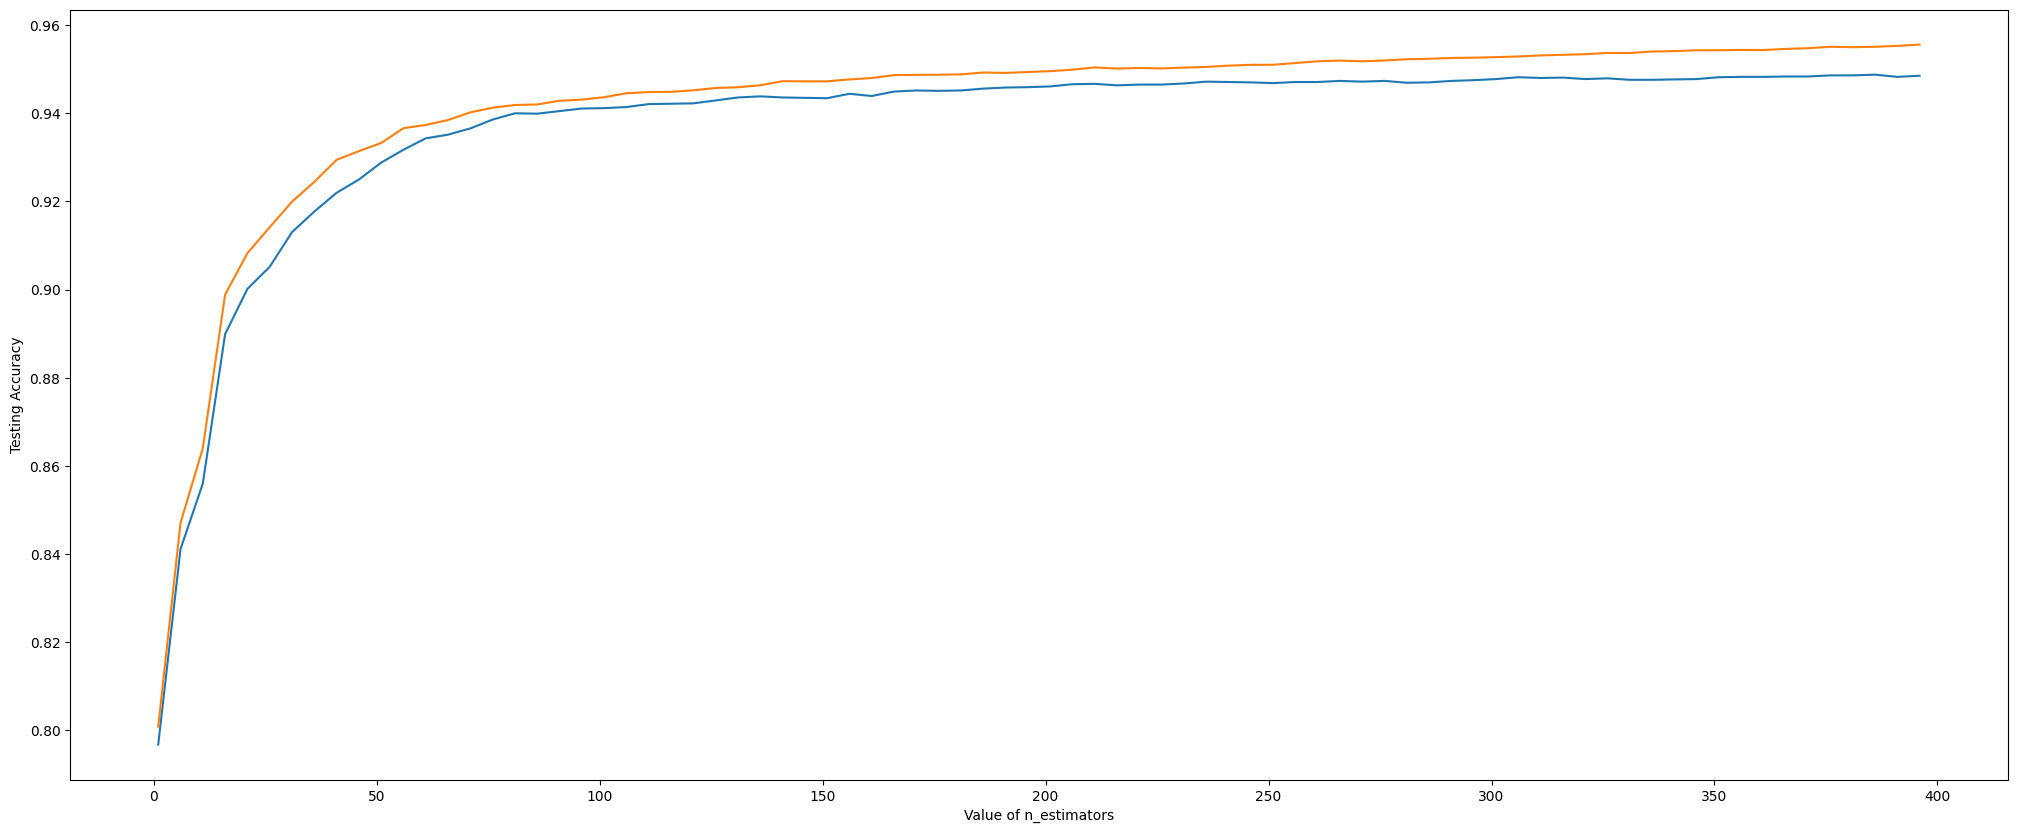

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=400
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in tqdm(k_range):
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_val)
  val_accu =  accuracy_score(y_val,y_pred)
  scores[k] =val_accu
  scores_list.append(val_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed.........................Val Accurecy: "+str(val_accu)," >>>Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Training Accuracy"], loc=0, frameon=True)



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

###Tunning `max_depth` (done)

  0%|          | 0/25 [00:00<?, ?it/s]

1/50 round completed.........................Val Accuracy: 0.8947148701678217  Training Accuracy0.9012345679012346
3/50 round completed.........................Val Accuracy: 0.9413041663187777  Training Accuracy0.9434424762927178
5/50 round completed.........................Val Accuracy: 0.9463137680554395  Training Accuracy0.9553229558060476
7/50 round completed.........................Val Accuracy: 0.9467312348668281  Training Accuracy0.9709250313115048
9/50 round completed.........................Val Accuracy: 0.9476496618518828  Training Accuracy0.9849525854356772
11/50 round completed.........................Val Accuracy: 0.9466477415045503  Training Accuracy0.9967793880837359
13/50 round completed.........................Val Accuracy: 0.9463137680554395  Training Accuracy0.9999642154231526
15/50 round completed.........................Val Accuracy: 0.9469817149536612  Training Accuracy1.0
17/50 round completed.........................Val Accuracy: 0.9452283543458295  Training Acc

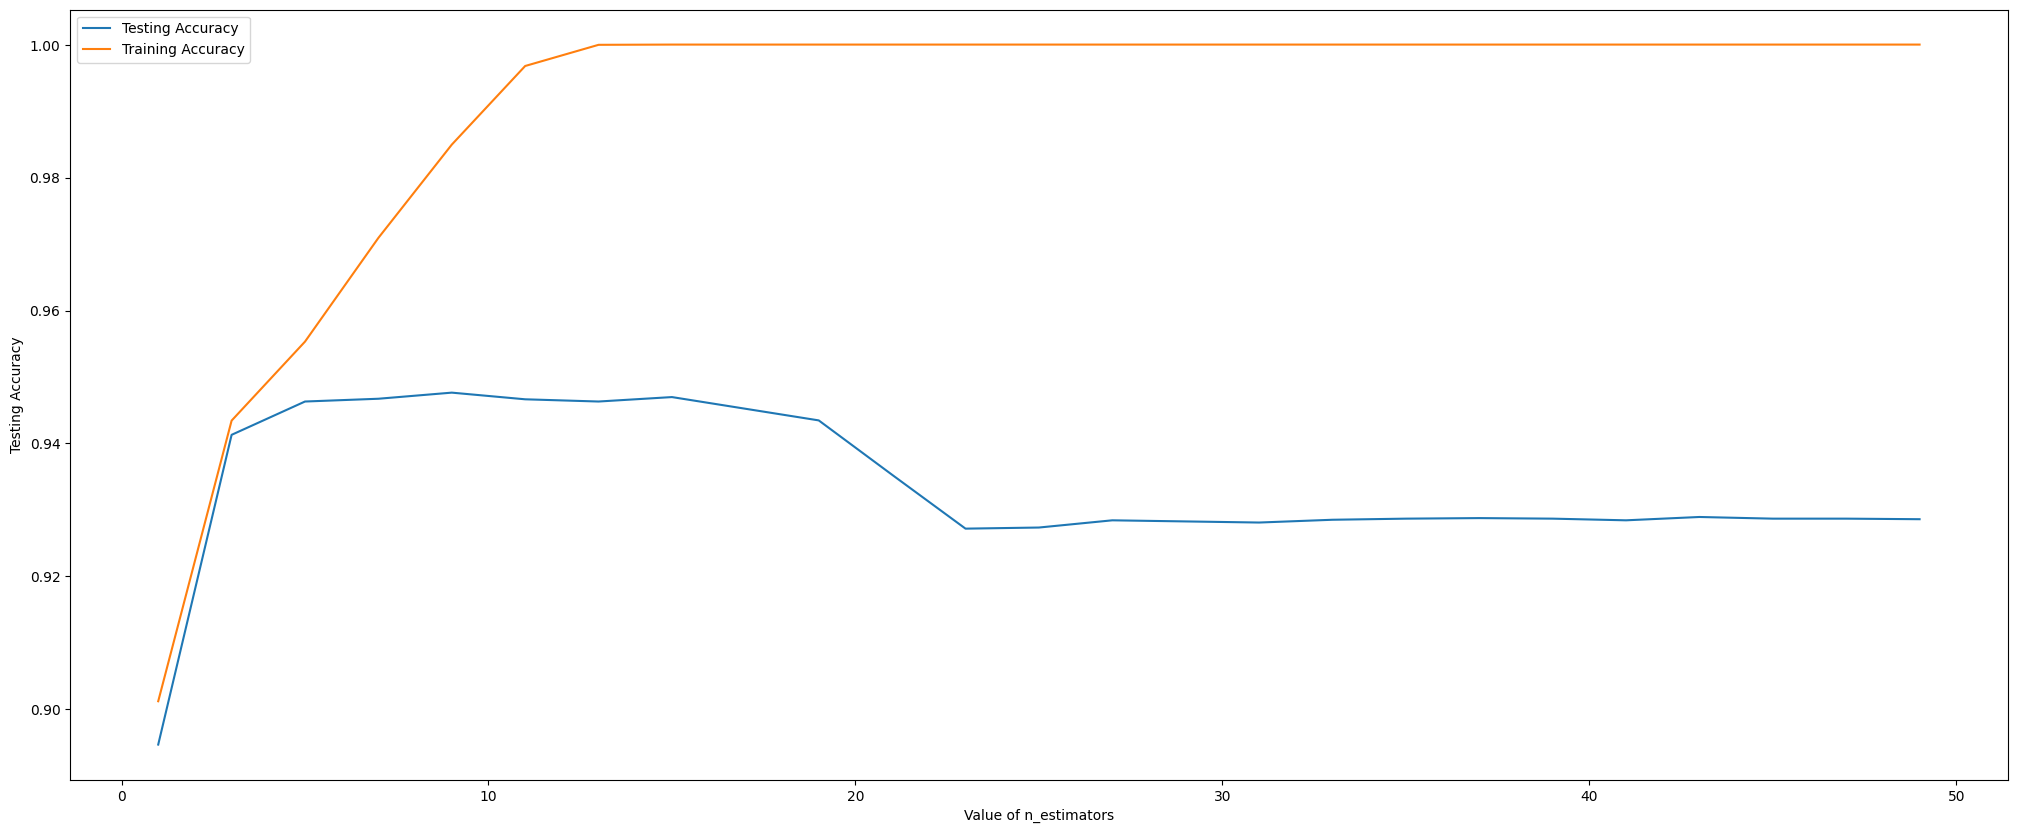

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in tqdm(k_range):
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)

  y_pred=classifier.predict(X_val)
  val_accu = accuracy_score(y_val,y_pred)
  scores[k] = val_accu
  scores_list.append(val_accu)

  y_pred=classifier.predict(X_train)
  train_accu =  accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed.........................Val Accuracy: "+str(val_accu)," Training Accuracy"+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Training Accuracy"], loc=0, frameon=True)



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:


gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)
print("Accurecy: ",accuracy_score(y_test, y_pred))

In [ ]:


gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)
print("Accurecy: ",accuracy_score(y_test, y_pred))

In [ ]:

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)
print("Accurecy: ",accuracy_score(y_test, y_pred))

##XGB

###Deafult Hyperparameters

In [ ]:
import xgboost as xgb
xgb_deafult = xgb.XGBClassifier()
xgb_deafult.fit(X_train.values,y_train.values)
y_pred_val = xgb_deafult.predict(X_val.values)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val,y_pred_val))
print("Accurecy: ",accuracy_score(y_val, y_pred_val))

[[5731  264]
 [ 345 5637]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5995
           1       0.96      0.94      0.95      5982

    accuracy                           0.95     11977
   macro avg       0.95      0.95      0.95     11977
weighted avg       0.95      0.95      0.95     11977

Accurecy:  0.9491525423728814


###Tunning `n_estimators` (done)

  0%|          | 0/250 [00:00<?, ?it/s]

1/250 round completed......................... Val Accureay: 0.8701678216581782  >>>>>>Training Accuracy: 0.877706208624083
2/250 round completed......................... Val Accureay: 0.8840277197962761  >>>>>>Training Accuracy: 0.8899624261943102
3/250 round completed......................... Val Accureay: 0.8886198547215496  >>>>>>Training Accuracy: 0.8984970477724101
4/250 round completed......................... Val Accureay: 0.9014778325123153  >>>>>>Training Accuracy: 0.9067453927357308
5/250 round completed......................... Val Accureay: 0.9099106621023628  >>>>>>Training Accuracy: 0.9154768294864913
6/250 round completed......................... Val Accureay: 0.9184269850546881  >>>>>>Training Accuracy: 0.9245124351404544
7/250 round completed......................... Val Accureay: 0.9243550137764047  >>>>>>Training Accuracy: 0.9297369833601717
8/250 round completed......................... Val Accureay: 0.9252734407614595  >>>>>>Training Accuracy: 0.9320450885668277
9

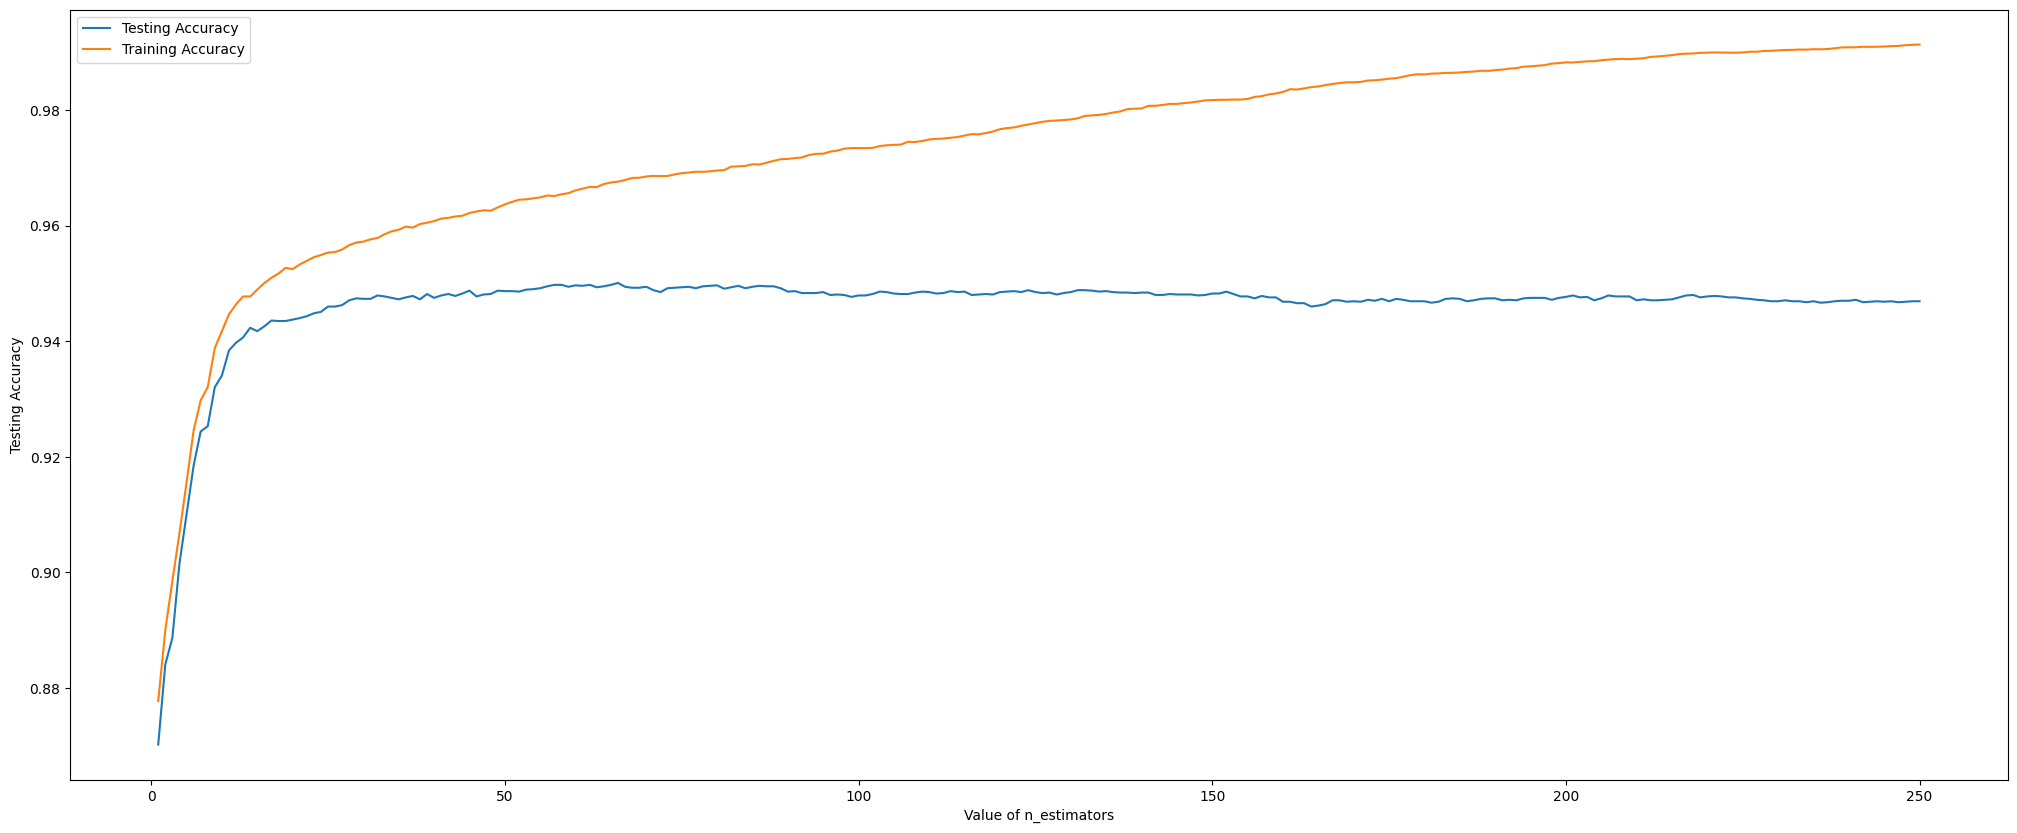

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in tqdm(k_range):
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train.values, y_train.values)

  y_pred=xgb_classifier.predict(X_val.values)
  val_accu = accuracy_score(y_val,y_pred)
  scores[k] = val_accu
  scores_list.append(val_accu)

  y_pred=xgb_classifier.predict(X_train.values)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed......................... Val Accureay: "+str(val_accu)," >>>>>>Training Accuracy: "+str(train_accu))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Training Accuracy"], loc=0, frameon=True)


print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

###Tunning `max_depth`(done)

  0%|          | 0/14 [00:00<?, ?it/s]

31/100 round completed......................... Val Accuracy: 0.9482341153878266  >>>>>>> Train Accuracy: 1.0
36/100 round completed......................... Val Accuracy: 0.9475661684896051  >>>>>>> Train Accuracy: 1.0
41/100 round completed......................... Val Accuracy: 0.9475661684896051  >>>>>>> Train Accuracy: 1.0
46/100 round completed......................... Val Accuracy: 0.9475661684896051  >>>>>>> Train Accuracy: 1.0
51/100 round completed......................... Val Accuracy: 0.9475661684896051  >>>>>>> Train Accuracy: 1.0
56/100 round completed......................... Val Accuracy: 0.9475661684896051  >>>>>>> Train Accuracy: 1.0
61/100 round completed......................... Val Accuracy: 0.9475661684896051  >>>>>>> Train Accuracy: 1.0
66/100 round completed......................... Val Accuracy: 0.9475661684896051  >>>>>>> Train Accuracy: 1.0
71/100 round completed......................... Val Accuracy: 0.9475661684896051  >>>>>>> Train Accuracy: 1.0
76/100 rou

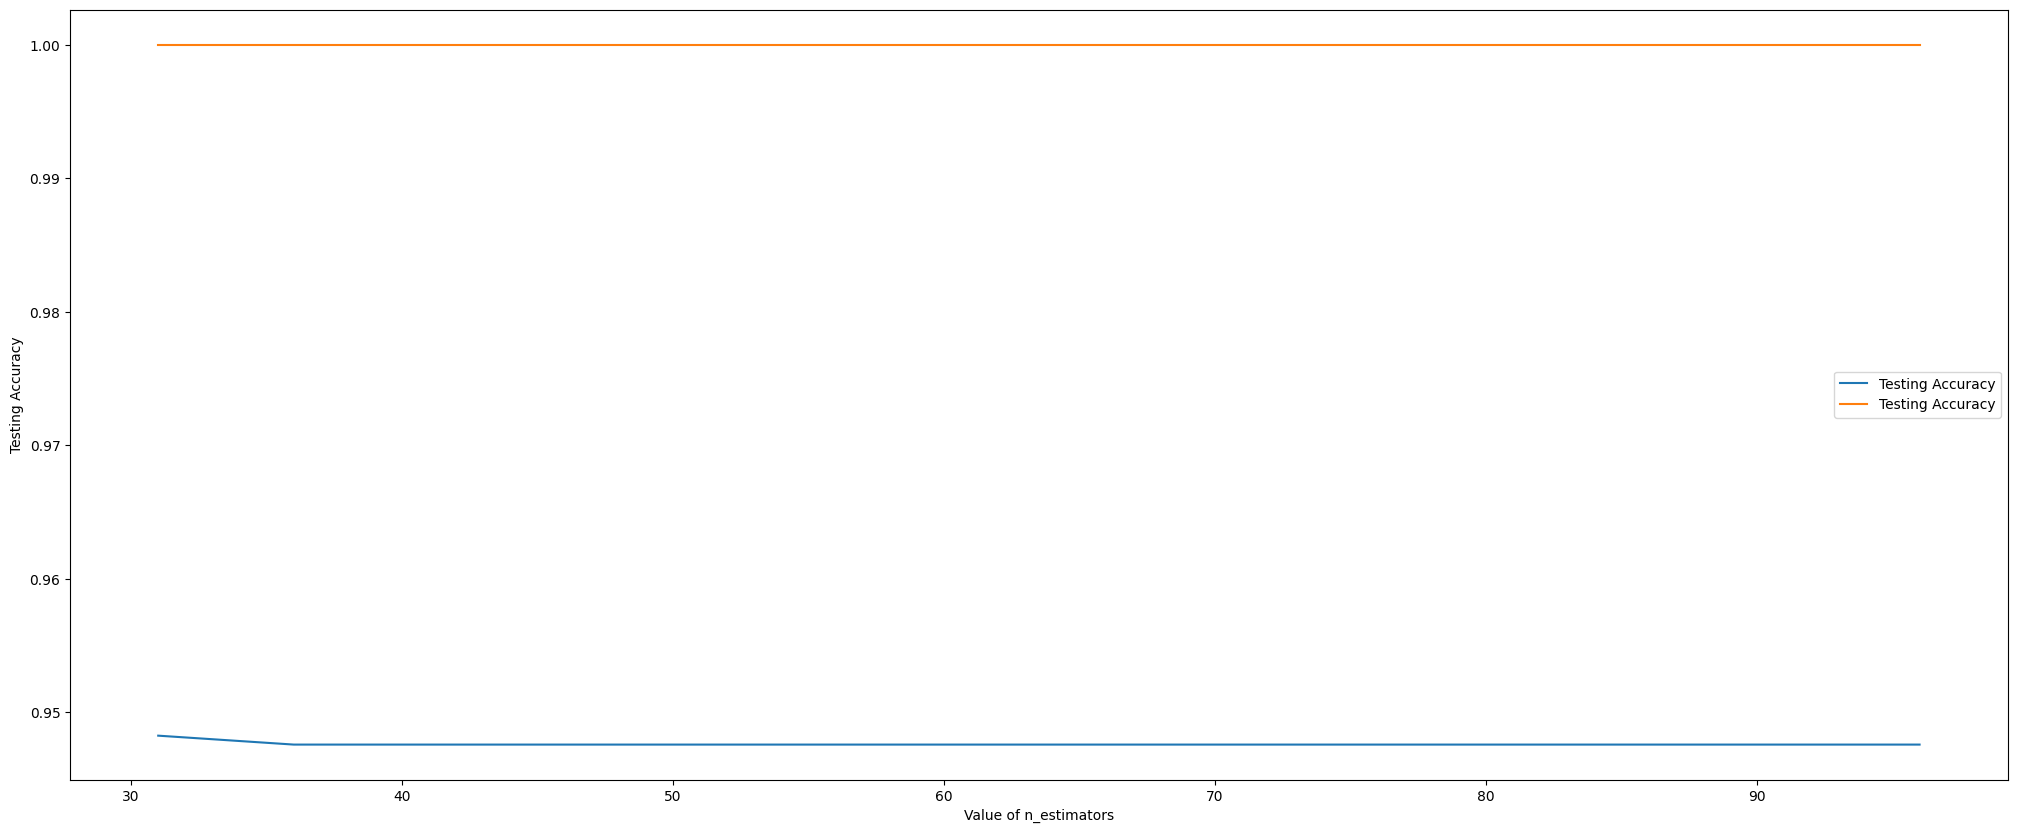

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=100
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in tqdm(k_range):
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train.values, y_train.values)

  y_pred=xgb_classifier.predict(X_val.values)
  val_accu = accuracy_score(y_val,y_pred)
  scores[k] = val_accu
  scores_list.append(val_accu)

  y_pred=xgb_classifier.predict(X_train.values)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed......................... Val Accuracy: "+str(val_accu)," >>>>>>> Train Accuracy: "+str(train_accu))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train.values,y_train.values)
y_pred = xgb_depth.predict(X_test.values)
print("Accurecy: ",accuracy_score(y_test, y_pred))

In [ ]:

xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train.values,y_train.values)
y_pred = xgb_estimator.predict(X_test.values)
print("Accurecy: ",accuracy_score(y_test, y_pred))

In [ ]:

xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train.values,y_train.values)
y_pred = xgb_all.predict(X_test.values)

print("Accurecy: ",accuracy_score(y_test, y_pred))

##RandomForestClassifier

###Deafult Hyperparameters

In [ ]:

from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier()
rf_default.fit(X_train, y_train)
y_pred_val=rf_default.predict(X_val)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val,y_pred_val))
print("Accurecy: ",accuracy_score(y_val, y_pred_val))

[[5741  254]
 [ 367 5615]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5995
           1       0.96      0.94      0.95      5982

    accuracy                           0.95     11977
   macro avg       0.95      0.95      0.95     11977
weighted avg       0.95      0.95      0.95     11977

Accurecy:  0.948150622025549


###Tunning `n_estimators` (done)

1/150 round completed......................... Val Accuracy: 0.9151707439258578  >>>>>>> Train Accuracy: 0.9661120057255322
2/150 round completed......................... Val Accuracy: 0.92126575937213  >>>>>>> Train Accuracy: 0.9685632492395777
3/150 round completed......................... Val Accuracy: 0.9368790181180596  >>>>>>> Train Accuracy: 0.9876006441223832
4/150 round completed......................... Val Accuracy: 0.9387993654504467  >>>>>>> Train Accuracy: 0.9867418142780462
5/150 round completed......................... Val Accuracy: 0.9420556065792769  >>>>>>> Train Accuracy: 0.9933977455716586
6/150 round completed......................... Val Accuracy: 0.9434749937379978  >>>>>>> Train Accuracy: 0.9923599928430846
7/150 round completed......................... Val Accuracy: 0.9442264339984971  >>>>>>> Train Accuracy: 0.9961531579889068
8/150 round completed......................... Val Accuracy: 0.9453953410703849  >>>>>>> Train Accuracy: 0.9952406512792986
9/150 roun

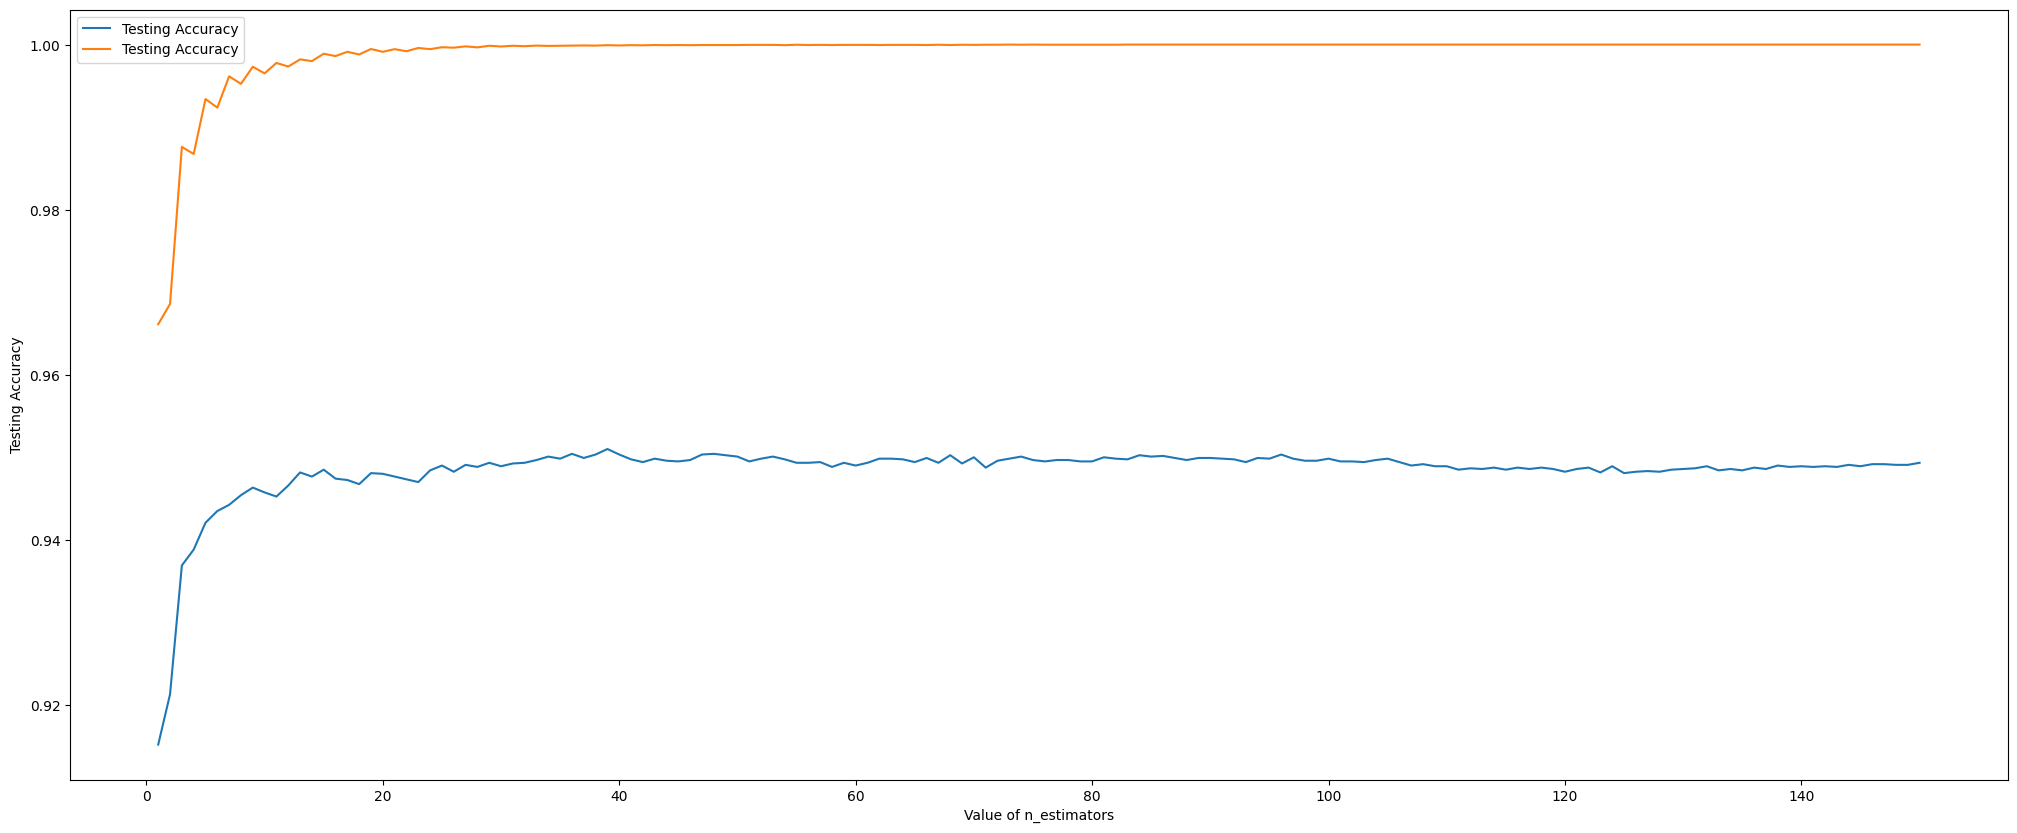

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)


  y_pred=classifier.predict(X_val)
  val_accu = accuracy_score(y_val,y_pred)
  scores[k] = val_accu
  scores_list.append(val_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed......................... Val Accuracy: "+str(val_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

###Tunning `max_depth`(done)

1/30 round completed......................... Val Accuracy: 0.7872589129164231  >>>>>>> Train Accuracy: 0.7907317945965289
2/30 round completed......................... Val Accuracy: 0.8345996493278784  >>>>>>> Train Accuracy: 0.8370907139023082
3/30 round completed......................... Val Accuracy: 0.866327126993404  >>>>>>> Train Accuracy: 0.8711218464841654
4/30 round completed......................... Val Accuracy: 0.8878684144610504  >>>>>>> Train Accuracy: 0.8931472535337269
5/30 round completed......................... Val Accuracy: 0.9041496201052016  >>>>>>> Train Accuracy: 0.909447128287708
6/30 round completed......................... Val Accuracy: 0.9130834098689155  >>>>>>> Train Accuracy: 0.9179638575773842
7/30 round completed......................... Val Accuracy: 0.9181765049678551  >>>>>>> Train Accuracy: 0.9242619431025229
8/30 round completed......................... Val Accuracy: 0.9222676797194623  >>>>>>> Train Accuracy: 0.9309536589729827
9/30 round complet

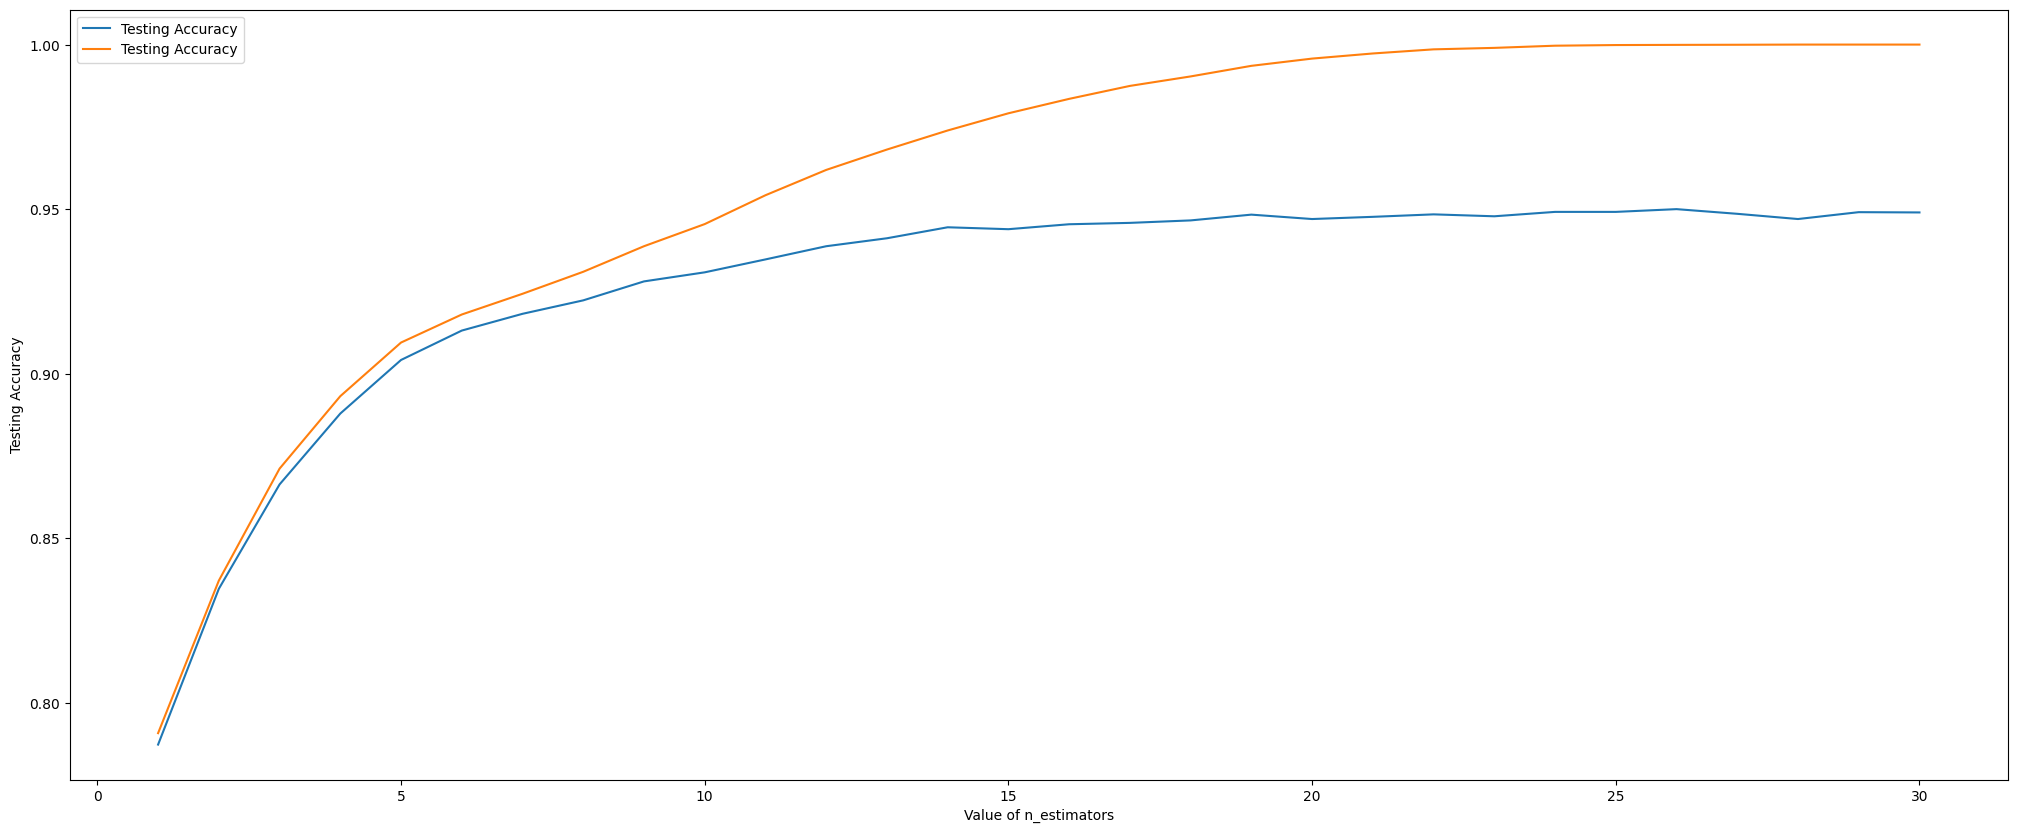

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)

  y_pred=classifier.predict(X_val)
  val_accu = accuracy_score(y_val,y_pred)
  scores[k] = val_accu
  scores_list.append(val_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed......................... Val Accuracy: "+str(val_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:

rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)
print("Accurecy: ",accuracy_score(y_test, y_pred))

In [ ]:

rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)
print("Accurecy: ",accuracy_score(y_test, y_pred))

In [ ]:

rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)
print("Accurecy: ",accuracy_score(y_test, y_pred))

#Evaluation metrics, Confusion Matrix and ROC Curve For best model


In [ ]:
#ROC Curve Function

graph_attributes={
    "Font Size"  : 15,
    "Font Color" : "black",
    "Legend Font Size"  : 15,
    "Legend Font Color" : "black",
    "Legend bgcolor"    : "LightSteelBlue",
    "Legend bordercolor": "White",
    "Legend borderwidth": 1

}


def ploty_ROC(model,X,y,graph_attributes):

    lebel_dict={
    0: 'no',
    1: 'yes'
    }

    if str(model)[:3] == "XGB":
      y_scores = model.predict_proba(X.values)
    else:
      y_scores = model.predict_proba(X)
    #y_scores = model.predict_proba(X)

    y_onehot = pd.get_dummies(y, columns=model.classes_)

    fig = go.Figure()
    fig.add_shape(
        type='line', line=dict(dash='dash', width=5),
        x0=0, x1=1, y0=0, y1=1
    )

    for i in range(y_scores.shape[1]):
        y_true = y_onehot.iloc[:, i]
        y_score = y_scores[:, i]

        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_score = roc_auc_score(y_true, y_score)
        name = f"{lebel_dict[y_onehot.columns[i]]} (AUC={auc_score:.2f})"
        fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

    fig.update_layout(
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
        width=800, height=800,
        font=dict(
            family="Arial Black, monospace",
            size=graph_attributes["Font Size"],
            color=graph_attributes["Font Color"]
        ),
        legend=dict(
            x=0.62,
            y=0.05,
            traceorder="reversed",
            title_font_family="Arial Black",
            font=dict(
                family="Arial Black, monospace",
                size=graph_attributes["Legend Font Size"],
                color=graph_attributes["Legend Font Color"]
            ),
            bgcolor=graph_attributes["Legend bgcolor"],
            bordercolor=graph_attributes["Legend bordercolor"],
            borderwidth=graph_attributes["Legend borderwidth"]
        ),
        #plot_bgcolor="",
    )
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', tickfont_family="Arial Black")
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black',tickfont_family="Arial Black")

    fig.show()



def conf_mat(mod, X_, y_):
  y_pred = mod.predict(X_)
  cm = confusion_matrix(y_,y_pred)
  plt.figure(figsize = (8,4))
  sn.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted',fontsize=14.0, fontweight='bold')
  plt.ylabel('Truth',fontsize=12.0, fontweight='bold')






ploty_ROC(ada_defult,X_test,y_test,graph_attributes)
conf_mat(ada_defult, X_test, y_test)